Total samples: 510000
Total states: 51


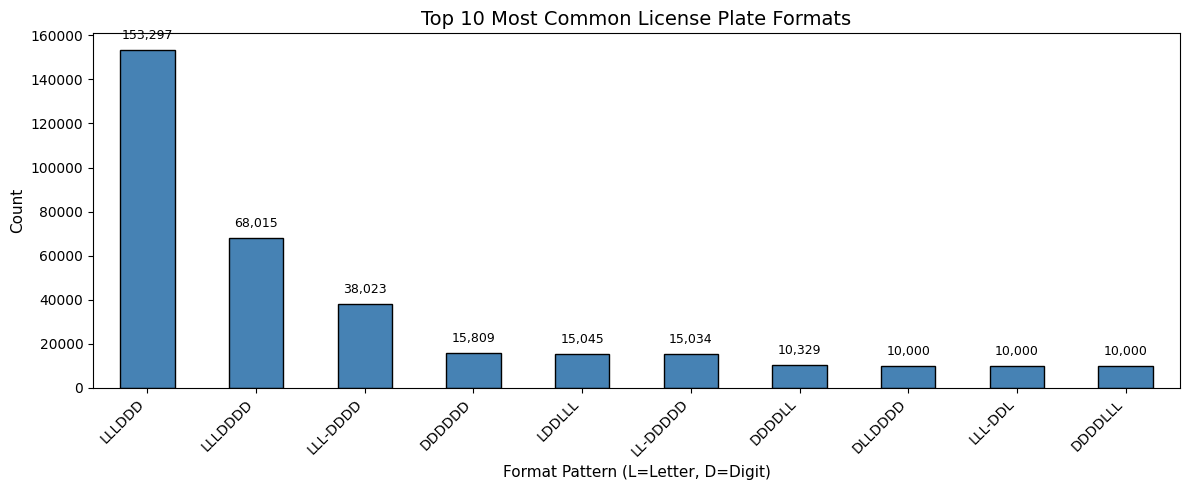

In [2]:
"""
Data Analysis: License Plate Format Distribution
Shows why many states are hard to distinguish - they share similar formats
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("dataset.csv")
print(f"Total samples: {len(df)}")
print(f"Total states: {df['state_code'].nunique()}")

# Convert plate to format pattern
def get_pattern(plate):
    pattern = []
    for ch in str(plate):
        if ch.isdigit():
            pattern.append('D')
        elif ch.isalpha():
            pattern.append('L')
        else:
            pattern.append('-')
    return ''.join(pattern)

df['pattern'] = df['plate_number'].apply(get_pattern)

# ============================================================
# Plot 1: Top 10 most common patterns
# ============================================================
plt.figure(figsize=(12, 5))

pattern_counts = df['pattern'].value_counts().head(10)
ax = pattern_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 10 Most Common License Plate Formats', fontsize=14)
plt.xlabel('Format Pattern (L=Letter, D=Digit)', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(pattern_counts):
    ax.text(i, v + 5000, f'{v:,}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('plot1_pattern_distribution.png', dpi=150)
plt.show()



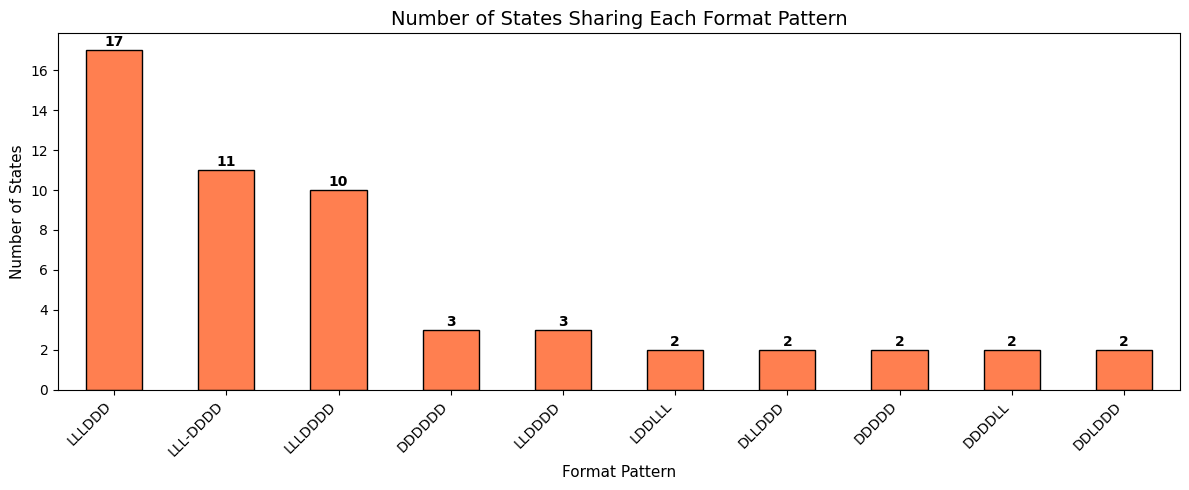

In [3]:
# ============================================================
# Plot 2: How many states share each pattern
# ============================================================
states_per_pattern = df.groupby('pattern')['state_code'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
ax = states_per_pattern.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Number of States Sharing Each Format Pattern', fontsize=14)
plt.xlabel('Format Pattern', fontsize=11)
plt.ylabel('Number of States', fontsize=11)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(states_per_pattern):
    ax.text(i, v + 0.2, str(v), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('plot2_states_per_pattern.png', dpi=150)
plt.show()



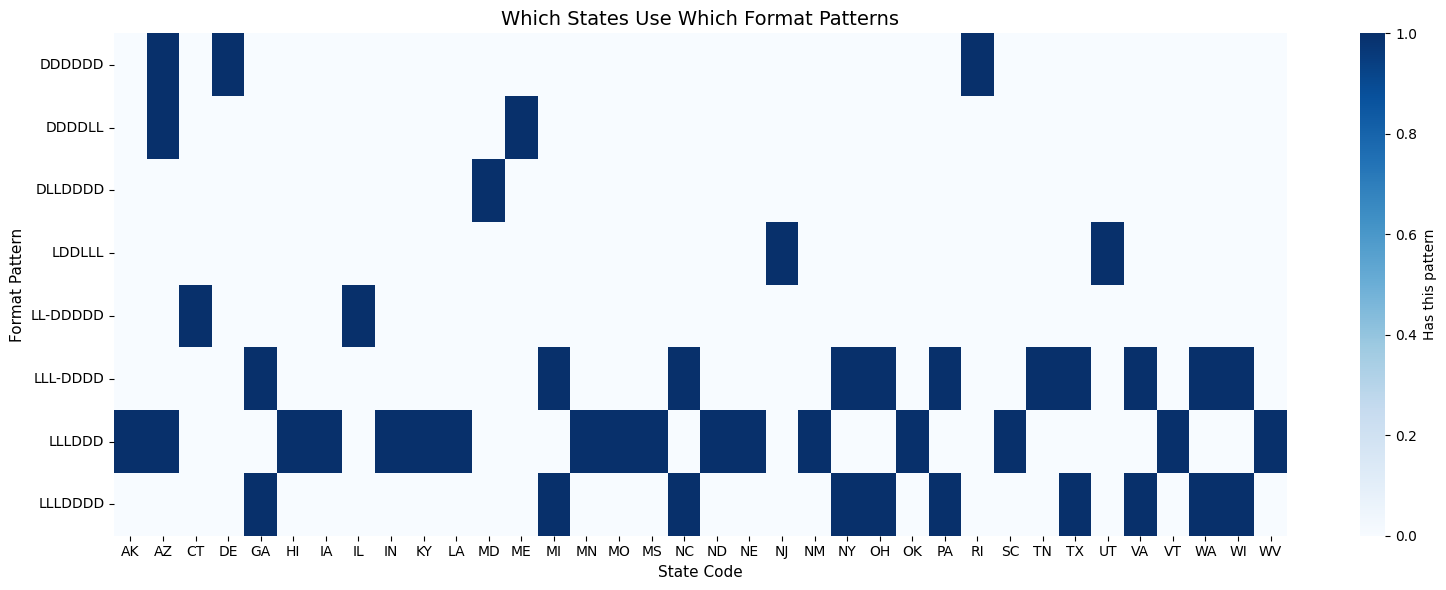


SUMMARY: Why accuracy is limited

States with UNIQUE format: 20
States with SHARED format: 31

Model can easily distinguish: 20 states
Model struggles with: 31 states (same format as others)

This is why accuracy plateaus around 50%


In [4]:
# ============================================================
# Plot 3: Heatmap - Pattern vs State
# ============================================================
top_patterns = df['pattern'].value_counts().head(8).index.tolist()
df_filtered = df[df['pattern'].isin(top_patterns)]

cross_tab = pd.crosstab(df_filtered['pattern'], df_filtered['state_code'])
cross_tab_binary = (cross_tab > 0).astype(int)

plt.figure(figsize=(16, 6))
sns.heatmap(cross_tab_binary, cmap='Blues', cbar_kws={'label': 'Has this pattern'})
plt.title('Which States Use Which Format Patterns', fontsize=14)
plt.xlabel('State Code', fontsize=11)
plt.ylabel('Format Pattern', fontsize=11)
plt.tight_layout()
plt.savefig('plot3_pattern_state_heatmap.png', dpi=150)
plt.show()

# ============================================================
# Print Summary
# ============================================================
print("\n" + "=" * 60)
print("SUMMARY: Why accuracy is limited")
print("=" * 60)

# States with unique patterns
most_common = df.groupby('state_code')['pattern'].agg(lambda x: x.mode()[0])
pattern_to_states = most_common.reset_index().groupby('pattern')['state_code'].apply(list)

unique_states = [s[0] for s in pattern_to_states if len(s) == 1]
shared_states = [state for states in pattern_to_states if len(states) > 1 for state in states]

print(f"\nStates with UNIQUE format: {len(unique_states)}")
print(f"States with SHARED format: {len(shared_states)}")
print(f"\nModel can easily distinguish: {len(unique_states)} states")
print(f"Model struggles with: {len(shared_states)} states (same format as others)")
print(f"\nThis is why accuracy plateaus around 50%")